# NLP with pytorch book

## Observation and target encoding
### One hot encoding representation

In [5]:
import nltk
#https://towardsdatascience.com/building-a-sentiment-classifier-using-scikit-learn-54c8e7c5d2f0


In [39]:
# ONE HOT ENCODING
# Consider these two sentences 
sentence_1 = 'Time flies like and arrow'
sentence_2 = 'Fruit flies like a banana'

### Sentence Tokenize

In [6]:
#Tokenizing a paragraph with multiple sentences
parag = """Hi my name is Ayman Al jabri.
I work for Citigroup as a businesss analyst. I work New York City. I Live in Fort Lee NJ"""

tokenized = nltk.sent_tokenize(parag)
tokenized

['Hi my name is Ayman Al jabri.',
 'I work for Citigroup as a businesss analyst.',
 'I work New York City.',
 'I Live in Fort Lee NJ']

In [43]:
one_hot_sentence1 = [1,1,0,1,1,0,1,0]

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
# import seaborn as sns


corpus = ['Fruit flies like time flies a fruit','time flies like an arrow']
one_hot_vector = CountVectorizer(binary=True)
one_hot = one_hot_vector.fit_transform(corpus).toarray()
one_hot

array([[0, 0, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1]])

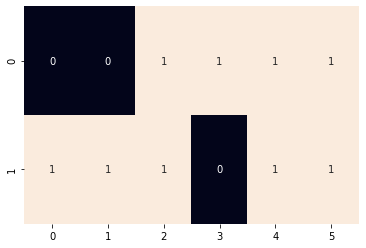

In [3]:
sns.heatmap(one_hot,annot=True,cbar=False)

### TF & TF-IDF Representation:
TF: Term Frequency representation; is the sum of one hot that represents how many times the word is mentioned in the sentence (corpus)

In [11]:
TF_hot_vector = CountVectorizer()
TF_hot = TF_hot_vector.fit_transform(corpus).toarray()
TF_hot

array([[0, 0, 2, 2, 1, 1],
       [1, 1, 1, 0, 1, 1]])

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

#IDF(w) = log N/nw
#it penalizes common tokens and rewards rare ones in vecotor representation
TFD_vectorizer = TfidfVectorizer()
TFD_hot = TFD_vectorizer.fit_transform(corpus).toarray()
TFD_hot

array([[0.        , 0.        , 0.53641614, 0.75391417, 0.26820807,
        0.26820807],
       [0.53309782, 0.53309782, 0.37930349, 0.        , 0.37930349,
        0.37930349]])

### Word Tokenization

In [33]:
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize

In [35]:
text = "Mary, don't slap the green witch"
textToken = word_tokenize(text)
textToken,textToken[2]

(['Mary', ',', 'do', "n't", 'slap', 'the', 'green', 'witch'], 'do')

In [7]:
tokenizer = TweetTokenizer()
tokenizer.tokenize(text.lower())

['mary', ',', "don't", 'slap', 'the', 'green', 'witch']

In [15]:
bbc ="""The Eurovision Song Contest was cancelled earlier this week because of the coronavirus outbreak - but organisers say an alternative event could be held.

The European Broadcasting Union (EBU) says it is “exploring alternative programming” to honour the songs and artists chosen to represent the 41 competing nations.

While this event would not be classed as a competition, the EBU believes it would "help unite and entertain audiences around Europe during these challenging times".

It means this year's entries will not be eligible for the 2021 competition."""

In [18]:
tweet = "I think this shot deserves one #FreeCallofDuty + Slice of pizza+ #CODPromo"

In [19]:
tokenizer.tokenize(tweet)

['I',
 'think',
 'this',
 'shot',
 'deserves',
 'one',
 '#FreeCallofDuty',
 '+',
 'Slice',
 'of',
 'pizza',
 '+',
 '#CODPromo']

### Lemmas and Stems

In [22]:
# import these modules 
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer() 
  
print("rocks :", lemmatizer.lemmatize("rocks")) 
print("corpora :", lemmatizer.lemmatize("corpora")) 
  
# a denotes adjective in "pos" 
print("better :", lemmatizer.lemmatize("better", pos ="a")) 

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aymanjabri/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


rocks : rock
corpora : corpus
better : good


In [29]:
lemmatizer.lemmatize('automobiles')

'automobile'

## Bigram wth NLTK

In [1]:
#https://www.youtube.com/watch?v=IqPWZL5f-7g&list=PLcTXcpndN-Sl9eYrKM6jtcOTgC52EJnqH

from nltk.collocations import BigramAssocMeasures,BigramCollocationFinder #Find Bigram
from nltk.corpus import webtext # Contains a library of text files

textwords = [w.lower() for w in webtext.words('pirates.txt')]

In [3]:
textwords[:10],len(textwords)

(['pirates', 'of', 'the', 'carribean', ':', 'dead', 'man', "'", 's', 'chest'],
 22679)

In [7]:
finder = BigramCollocationFinder.from_words(textwords,window_size=2)

In [8]:
finder.nbest(BigramAssocMeasures.likelihood_ratio,10)

[("'", 's'),
 ('jack', 'sparrow'),
 (']', '['),
 ('will', 'turner'),
 ('sparrow', ':'),
 ('elizabeth', 'swann'),
 ('turner', ':'),
 ('davy', 'jones'),
 ('swann', ':'),
 ("'", 't')]

We need to apply a filter to get rid of useless words:

Import a list of STOP words from nltk

In [9]:
from nltk.corpus import stopwords

ignore_words = stopwords.words('english')

In [11]:
ignore_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [12]:
#Create a lambda filter to exclude words less than three letters or in stopwords
IgnoreFilter = lambda w: len(w)<3 or w in ignore_words

In [13]:
# Now we apply the filter function to finder function
finder.apply_word_filter(IgnoreFilter)

In [14]:
# Re run finder for nbest using likelihood ration
finder.nbest(BigramAssocMeasures.likelihood_ratio,10)

[('jack', 'sparrow'),
 ('elizabeth', 'swann'),
 ('davy', 'jones'),
 ('flying', 'dutchman'),
 ('lord', 'cutler'),
 ('cutler', 'beckett'),
 ('black', 'pearl'),
 ('tia', 'dalma'),
 ('cannibal', 'island'),
 ('port', 'royal')]

## Trigram

In [15]:
from nltk.collocations import TrigramAssocMeasures,TrigramCollocationFinder

In [18]:
textWords = [w.lower() for w in webtext.words('grail.txt')]
textWords[:10]

['scene', '1', ':', '[', 'wind', ']', '[', 'clop', 'clop', 'clop']

In [23]:
# First we create a finder function:
t_finder = TrigramCollocationFinder.from_words(textWords)

# Second we apply n-best words using the Measure of choice
t_finder.nbest(TrigramAssocMeasures.likelihood_ratio,10)

[('[', 'boom', ']'),
 ('[', 'singing', ']'),
 ('[', 'music', ']'),
 ('[', 'clang', ']'),
 ('.', 'arthur', ':'),
 ('[', 'chanting', ']'),
 ('[', 'pause', ']'),
 ('[', 'squeak', ']'),
 ('[', 'thud', ']'),
 ('[', 'bonk', ']')]

In [22]:
# We apply the same labmda filter above
t_finder.apply_word_filter(IgnoreFilter)

t_finder.nbest(TrigramAssocMeasures.likelihood_ratio,10)

[('clop', 'clop', 'clop'),
 ('mumble', 'mumble', 'mumble'),
 ('squeak', 'squeak', 'squeak'),
 ('saw', 'saw', 'saw'),
 ('black', 'knight', 'kills'),
 ('black', 'knight', 'always'),
 ('pie', 'iesu', 'domine'),
 ('clap', 'clap', 'clap'),
 ('squeak', 'squeak', '...]'),
 ('...', 'head', 'knight')]

In [28]:
t_finder.score_ngrams(TrigramAssocMeasures.likelihood_ratio)[:10]

[(('[', 'boom', ']'), 2594.3499225967994),
 (('[', 'singing', ']'), 2537.8050570270143),
 (('[', 'music', ']'), 2468.738779238396),
 (('[', 'clang', ']'), 2415.0101832477076),
 (('.', 'arthur', ':'), 2343.8790644572255),
 (('[', 'chanting', ']'), 2268.2365317327767),
 (('[', 'pause', ']'), 2268.2365317327767),
 (('[', 'squeak', ']'), 2265.5967687533835),
 (('[', 'thud', ']'), 2259.8028693252004),
 (('[', 'bonk', ']'), 2254.982128624187)]